-----

### 엑셀 파일 전처리

In [5]:
import pandas as pd

In [6]:
# folder name 
folderName = "SMARTSTORE20201001_1"

fileName = "./" + folderName + "/SMARTSTORE_1.xls"
fileName

'./SMARTSTORE20201001_1/SMARTSTORE_1.xls'

In [8]:
ss = pd.read_excel(fileName)
    
# 자동 업로드 안되는 요소 제거
ss["상품 상세정보"] = [x.replace("IMG align=absMiddle ", "") for x in ss["상품 상세정보"]]
    
ss.to_excel(fileName.replace("1.xls", "new.xls"))

---

###  제목 변경

In [9]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
# plt.rc('font', family='Nanum Gothic') # for mac
plt.rc('font', family='Malgun Gothic') # for window

In [10]:
newfileName = "./" + folderName + "/SMARTSTORE_new.xls"
newfileName

'./SMARTSTORE20201001_1/SMARTSTORE_new.xls'

In [11]:
def reTitle(title):
    if(len(title) < 16):
        cutNum = -1
    else:
        cutNum = title[15:].find(" ") + 15
    if(cutNum == -1):
        return title
    return title[:cutNum]+"\n"+title[cutNum+1:]

In [22]:
# 사용할 file, row 범위 
file = newfileName
row = (10, 20)
plt.rcParams["figure.figsize"] = (15,7)

imgDir = file.replace("SMARTSTORE_new.xls", "prdimg1/")
myFile = file.replace("_new.xls", "_my.xls")

if row[0] == 0:
    ss = pd.read_excel(file)
else:
    re_ss = pd.read_excel(myFile)
    if "Unnamed: 0" in re_ss.columns:
        ss = re_ss.drop("Unnamed: 0", axis = 1)

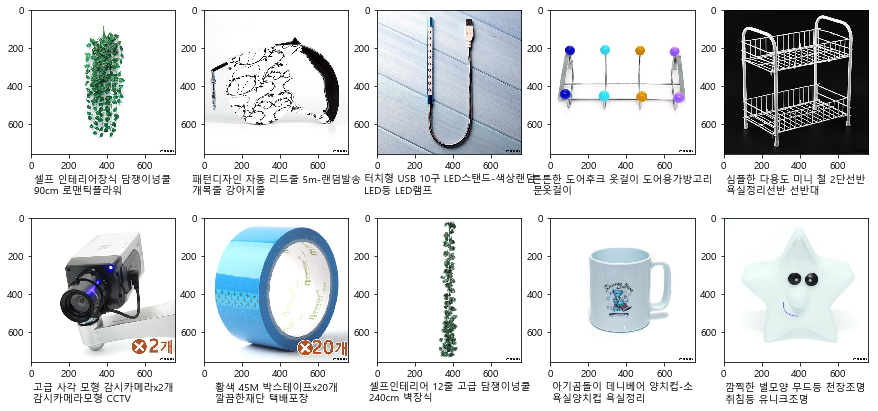

In [23]:
# 이미지 1줄에 5개씩 출력
fig = plt.figure()
plt.tight_layout()
for i in range(row[0], row[1]):
    imgFileName = ss.iloc[i]["대표 이미지 파일명"]
    title = ss.iloc[i]["상품명"]
    img = cv2.imread(imgDir + imgFileName)
    ax1 = fig.add_subplot((row[1]-row[0])//5 , 5, i-row[0]+1)
    ax1.imshow(img)
    ax1.set_xlabel(reTitle(title), multialignment= "left")

In [15]:
# 새 정보 넣기 (판매자 특이사항에 라벨링 m(modified))
newTitle = [
    "담쟁이넝쿨 조화 행잉플랜트 플랜테리어 넝쿨조화",
    "야외산책 강아지 애견 리드줄 자동줄 패턴 랜덤발송",
    "터치 USB 북라이드 스탠드 독서등 10구 LED 색상 랜덤",
    "도어훅 문옷걸이 방문 문걸이 행거 도어후크 가방 모자걸이",
    "철제 2단 선반 스텐드 수납 다용도실",
    "모형CCTV 실내 실외 방범용 가짜CCTV",
    "지시저울 앉은뱅이 눈금 접시 저울",
    "담쟁이넝쿨 조화 행잉플랜트 플랜테리어 넝쿨조화 인테리어",
    "실내 인테리어 사각 인조잔디 베란다 화장실장식 벽장식 5개",
    "반짇고리 바느질 실 바늘 세트 반짓고리 옷수선"
]
ss.iloc[row[0]:row[1]]["상품명"] = newTitle
ss.iloc[row[0]:row[1]]["판매자 특이사항"] = "m"
ss.to_excel(myFile)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [17]:
# ss[["상품명","판매자 특이사항"]].head(50)

---

### 파일 저장하기

In [114]:
printRow = (0,50)

printFile = file.replace("_new.xls", "_"+str(printRow[0])+"_"+str(printRow[1])+".xls")
ss["원산지 코드"] = ss["원산지 코드"].replace(4, "04")
ss.iloc[printRow[0]:printRow[1]].to_excel(printFile, index=False, sheet_name="ver.2.1")